<a href="https://colab.research.google.com/github/bsenst/UWWi_DataDive_Dec22/blob/main/external_datasets/news/working_with_readywisconsin_tweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# load tweet csv

In [1]:
! wget https://github.com/bsenst/UWWi_DataDive_Dec22/raw/main/external_datasets/Weather%20Datasets/ReadyWiscEmergencyAlertTweetArchive.csv

--2022-12-04 13:43:08--  https://github.com/bsenst/UWWi_DataDive_Dec22/raw/main/external_datasets/Weather%20Datasets/ReadyWiscEmergencyAlertTweetArchive.csv
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/bsenst/UWWi_DataDive_Dec22/main/external_datasets/Weather%20Datasets/ReadyWiscEmergencyAlertTweetArchive.csv [following]
--2022-12-04 13:43:09--  https://raw.githubusercontent.com/bsenst/UWWi_DataDive_Dec22/main/external_datasets/Weather%20Datasets/ReadyWiscEmergencyAlertTweetArchive.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18690673 (18M) [text/plain]
Saving to: ‘ReadyWiscEmergencyAl

# import libraries

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# discover @ReadyWisconsin tweets

In [18]:
tweets = pd.read_csv("/content/ReadyWiscEmergencyAlertTweetArchive.csv", index_col=0)
tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   _type             10000 non-null  object 
 1   url               10000 non-null  object 
 2   date              10000 non-null  object 
 3   content           10000 non-null  object 
 4   renderedContent   10000 non-null  object 
 5   id                10000 non-null  int64  
 6   user              10000 non-null  object 
 7   replyCount        10000 non-null  int64  
 8   retweetCount      10000 non-null  int64  
 9   likeCount         10000 non-null  int64  
 10  quoteCount        10000 non-null  int64  
 11  conversationId    10000 non-null  int64  
 12  lang              10000 non-null  object 
 13  source            10000 non-null  object 
 14  sourceUrl         10000 non-null  object 
 15  sourceLabel       10000 non-null  object 
 16  outlinks          2542 non-null   object 

In [19]:
tweets = tweets.drop(["_type", "user", "media", "coordinates", "place", "cashtags", "retweetedTweet"], axis=1)

In [20]:
tweets.isna().sum()

url                    0
date                   0
content                0
renderedContent        0
id                     0
replyCount             0
retweetCount           0
likeCount              0
quoteCount             0
conversationId         0
lang                   0
source                 0
sourceUrl              0
sourceLabel            0
outlinks            7458
tcooutlinks         7458
quotedTweet         9565
inReplyToTweetId    9958
inReplyToUser       9958
mentionedUsers      9714
hashtags            1763
dtype: int64

In [23]:
tweets["date"] = pd.to_datetime(tweets["date"])

## 10.000 tweets from 2014 to 2022, seasonality: more tweets during summer

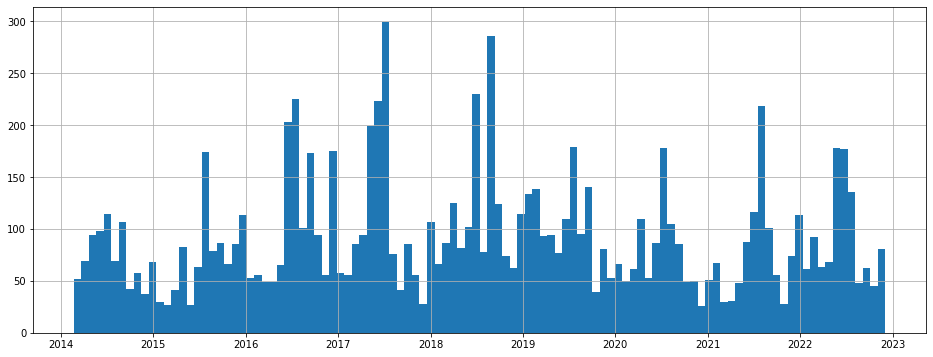

In [34]:
plt.figure(figsize=(16,6))
tweets["date"].hist(bins=12*9)
plt.show()

# loading uwwi datasets

In [30]:
uwwi22 = pd.read_csv("https://github.com/datakind/UWWi_DataDive_Dec22/raw/main/uwwi_datasets/uwwi_dataset_interactions/uwwi_dataset_interactions_2022.csv")
uwwi21 = pd.read_csv("https://github.com/datakind/UWWi_DataDive_Dec22/raw/main/uwwi_datasets/uwwi_dataset_interactions/uwwi_dataset_interactions_2021.csv")
uwwi20 = pd.read_csv("https://github.com/datakind/UWWi_DataDive_Dec22/raw/main/uwwi_datasets/uwwi_dataset_interactions/uwwi_dataset_interactions_2020.csv")

uwwi = pd.DataFrame()
uwwi = pd.concat([uwwi20, uwwi21, uwwi22])

uwwi["Interaction_CreateStamp"] = pd.to_datetime(uwwi.Interaction_CreateStamp, utc=True)
uwwi["Interaction_EditStamp"] = pd.to_datetime(uwwi.Interaction_EditStamp, utc=True)

uwwi.head()

,Client_Id,Interaction_CreateStamp,Interaction_ClientId,Interaction_Id,Interaction_CreateAccountId_href_label,Interaction_CreatePortalId,Interaction_CreateFormsetDeploymentId,Interaction_EditAccountId_href_label,Interaction_EditPortalId,Interaction_EditFormsetDeploymentId,...,InteractionOption_SwfSecondaryNeeds,InteractionOption_SwfCounty,InteractionOption_WhyWasThereNoReferralGiven,InteractionOption_UnableToContact,InteractionCustom_CallerReached,InteractionCustom_FollowUpUnmetNeeds,InteractionCustom_FollowUpComplete,InteractionCustom_FollowUpAttempt1,InteractionCustom_FollowUpAttempt2,InteractionCustom_FollowUpAttempt3
0,2882,2021-01-01 04:24:58.261829+00:00,2882,864821,Sarah Weltzien (486),1,1170,Kelly McBride (1248),1,1433,...,[],[],[],[],Unselected,Unselected,Unselected,NaN,NaN,NaN
1,19395,2021-01-01 02:33:09.491878+00:00,19395,864798,Alexis Almond (950),1,689,Kelly McBride (1248),1,1433,...,[],[],[],[],Unselected,Unselected,Unselected,NaN,NaN,NaN
2,40920,2021-01-01 02:23:04.791292+00:00,40920,864795,Alexis Almond (950),1,689,Kelly McBride (1248),1,1433,...,[],[],[],[],Unselected,Unselected,Unselected,NaN,NaN,NaN
3,2679,2021-01-01 01:57:46.375577+00:00,2679,864788,Sarah Weltzien (486),1,1170,Kelly McBride (1248),1,1433,...,[],[],[],[],Unselected,Unselected,Unselected,NaN,NaN,NaN
4,2680,2021-01-01 01:36:36.248750+00:00,2680,864781,Kari Gabel (53),1,1170,Kelly McBride (1248),1,1433,...,[],[],[],[],Unselected,Unselected,Unselected,NaN,NaN,NaN


# @ReadyWisconsin & UWWi Calls correlate

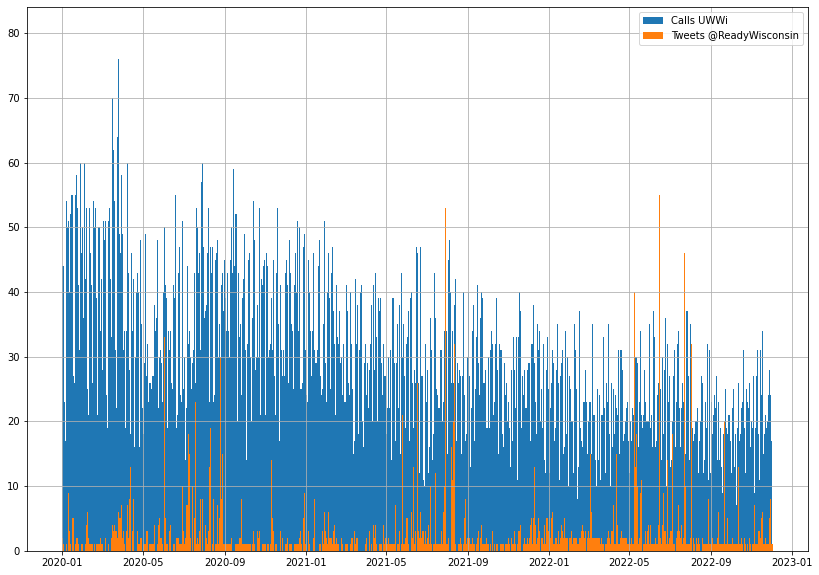

In [37]:
plt.figure(figsize=(14,10))
uwwi.Interaction_CreateStamp.hist(bins=365*3)
tweets["date"][tweets['date'] > "2020-01-01"].hist(bins=3*365)
plt.legend(labels=["Calls UWWi", "Tweets @ReadyWisconsin"])
plt.show()

## on average 3 tweets/day, max 57/d

In [48]:
tweets20 = tweets[tweets['date'] > "2020-01-01"]
tweets20_count = tweets20["url"].groupby(tweets20['date'].dt.floor('d')).count()
tweets20_count.describe()

count    901.000000
mean       3.264151
std        5.167971
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max       57.000000
Name: url, dtype: float64

In [50]:
tweets20_count

date
2020-01-01 00:00:00+00:00    2
2020-01-02 00:00:00+00:00    1
2020-01-03 00:00:00+00:00    1
2020-01-06 00:00:00+00:00    2
2020-01-07 00:00:00+00:00    1
                            ..
2022-11-28 00:00:00+00:00    8
2022-11-29 00:00:00+00:00    5
2022-11-30 00:00:00+00:00    3
2022-12-01 00:00:00+00:00    1
2022-12-02 00:00:00+00:00    1
Name: url, Length: 901, dtype: int64

In [49]:
uwwi.Interaction_CreateStamp.groupby(uwwi["Interaction_CreateStamp"].dt.floor('d')).count()

Interaction_CreateStamp
2020-01-01 00:00:00+00:00    35
2020-01-02 00:00:00+00:00    46
2020-01-03 00:00:00+00:00    43
2020-01-04 00:00:00+00:00    34
2020-01-05 00:00:00+00:00    14
                             ..
2022-11-27 00:00:00+00:00    12
2022-11-28 00:00:00+00:00    28
2022-11-29 00:00:00+00:00    24
2022-11-30 00:00:00+00:00    23
2022-12-01 00:00:00+00:00    13
Name: Interaction_CreateStamp, Length: 1066, dtype: int64